In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE

# Load dataset
df = pd.read_csv("Synthetic_PCOS_10k.csv")  # Ensure the file is in the same directory

# Drop irrelevant columns
df.drop(columns=["Sl. No", "Patient File No.", "Unnamed: 44"], inplace=True, errors='ignore')

# Handle missing values and type issues
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df.dropna(thresh=2, inplace=True)
df.fillna(0, inplace=True)

# Round values
for col in ["BMI", "FSH/LH", "Waist:Hip Ratio"]:
    if col in df.columns:
        df[col] = df[col].round(2)

# Save cleaned dataset (before SMOTE)
df.to_csv("PCOS_original_cleaned_1.csv", index=False)

# Split features and target
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"]

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

# Apply Borderline SMOTE
smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Create final DataFrame
df_processed = pd.DataFrame(X_scaled, columns=X.columns)
df_processed["PCOS (Y/N)"] = y_resampled.reset_index(drop=True)

# Save final preprocessed file
df_processed.to_csv("PCOS_after_preprocessing_1.csv", index=False)
print("Files saved: 'PCOS_original_cleaned_1.csv' and 'PCOS_after_preprocessing_1.csv'")


Class distribution before SMOTE:
PCOS (Y/N)
1    7000
0    3000
Name: count, dtype: int64

Class distribution after SMOTE:
PCOS (Y/N)
1    7000
0    7000
Name: count, dtype: int64
Files saved: 'PCOS_original_cleaned_1.csv' and 'PCOS_after_preprocessing_1.csv'



📊 All Features with MI Scores:
               Feature  MI Score
       Waist:Hip Ratio  0.211718
           Waist(inch)  0.208786
    Cycle length(days)  0.208265
       Fast food (Y/N)  0.208119
           Height(Cm)   0.200004
II    beta-HCG(mIU/mL)  0.198675
  I   beta-HCG(mIU/mL)  0.198503
            PRG(ng/mL)  0.196376
      Endometrium (mm)  0.195951
            RBS(mg/dl)  0.194955
  Avg. F size (L) (mm)  0.194775
            PRL(ng/mL)  0.193867
           TSH (mIU/L)  0.193288
              Hb(g/dl)  0.192899
            LH(mIU/mL)  0.192883
           Weight (Kg)  0.191966
  Avg. F size (R) (mm)  0.189501
 Marraige Status (Yrs)  0.188109
           FSH(mIU/mL)  0.187763
        Vit D3 (ng/mL)  0.186560
            AMH(ng/mL)  0.185418
                FSH/LH  0.178497
                   BMI  0.168112
     Reg.Exercise(Y/N)  0.015948
      Weight gain(Y/N)  0.012610
      hair growth(Y/N)  0.012335
  Skin darkening (Y/N)  0.010695
            Cycle(R/I)  0.009101
      Pulse

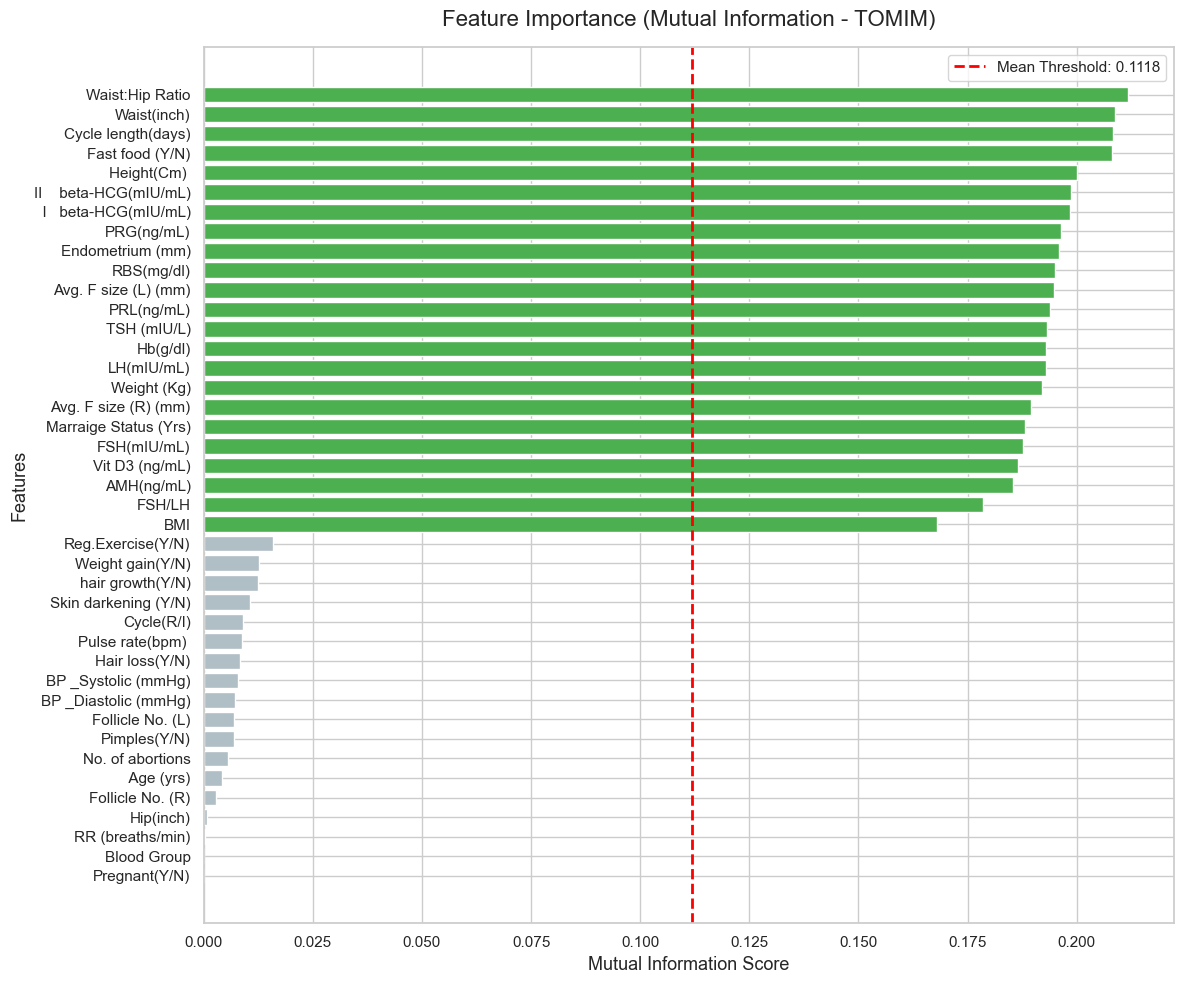

In [2]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the preprocessed dataset
df = pd.read_csv("PCOS_after_preprocessing_1.csv")

# Step 2: Separate features and target
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"]

# Step 3: Calculate Mutual Information Scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Step 4: Create a DataFrame of features and their MI scores
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
})

# Step 5: Sort features by MI score
mi_df = mi_df.sort_values(by='MI Score', ascending=True).reset_index(drop=True)

# Step 6: Compute the threshold (mean score) and select top features
threshold = mi_df["MI Score"].mean()
tomim_selected_features = mi_df[mi_df["MI Score"] > threshold]["Feature"].tolist()

# Step 7: Print results
print("\n📊 All Features with MI Scores:")
print(mi_df.sort_values(by="MI Score", ascending=False).to_string(index=False))

print(f"\n📌 Mean MI Score Threshold: {threshold:.4f}")
print(f"✅ Selected Features ({len(tomim_selected_features)}):")
print(tomim_selected_features)

# Step 8: Clean Visualization with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Color coding: selected vs not selected
colors = ['#4CAF50' if score > threshold else '#B0BEC5' for score in mi_df['MI Score']]

# Plot horizontal bar chart
plt.barh(mi_df['Feature'], mi_df['MI Score'], color=colors)
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Mean Threshold: {threshold:.4f}')

# Title and labels
plt.title("Feature Importance (Mutual Information - TOMIM)", fontsize=16, pad=15)
plt.xlabel("Mutual Information Score", fontsize=13)
plt.ylabel("Features", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()


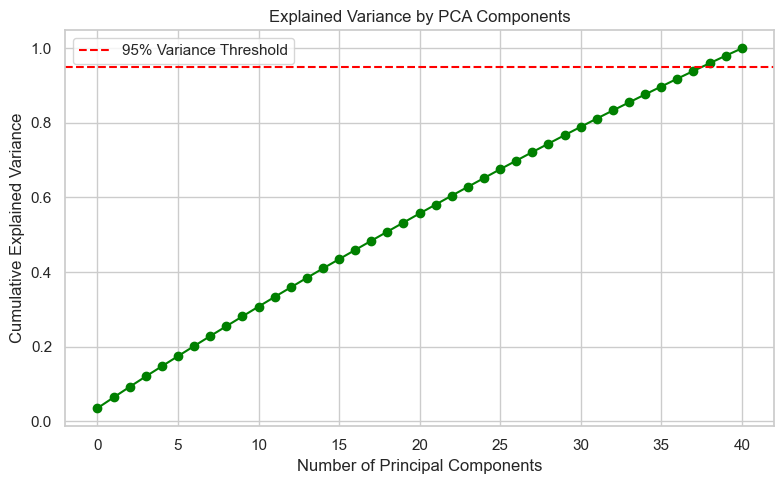


✅ Number of components to retain 95% variance: 39

📌 Selected 39 features using TOPCA:
['Waist:Hip Ratio', 'PRL(ng/mL)', 'Cycle length(days)', 'FSH(mIU/mL)', 'Marraige Status (Yrs)', 'Endometrium (mm)', 'RR (breaths/min)', 'Pregnant(Y/N)', 'RBS(mg/dl)', 'II    beta-HCG(mIU/mL)', 'Hb(g/dl)', 'Pimples(Y/N)', 'Avg. F size (L) (mm)', 'No. of abortions', ' Age (yrs)', 'BP _Systolic (mmHg)', 'BMI', 'Waist(inch)', 'Height(Cm) ', 'Avg. F size (R) (mm)', 'Hip(inch)', 'Blood Group', 'Vit D3 (ng/mL)', 'FSH/LH', 'Fast food (Y/N)', 'Pulse rate(bpm) ', 'Weight (Kg)', '  I   beta-HCG(mIU/mL)', 'TSH (mIU/L)', 'Follicle No. (L)', 'AMH(ng/mL)', 'LH(mIU/mL)', 'Follicle No. (R)', 'Hair loss(Y/N)', 'Reg.Exercise(Y/N)', 'BP _Diastolic (mmHg)', 'Cycle(R/I)', 'hair growth(Y/N)', 'PRG(ng/mL)']


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load preprocessed dataset
df = pd.read_csv("PCOS_after_preprocessing_1.csv")

# Split features and target
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"]

# Step 1: Apply PCA (initially full components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Step 2: Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', color='green')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 3: Determine number of components to retain 95% variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\n✅ Number of components to retain 95% variance: {num_components}")

# Step 4: Re-fit PCA with only required components
pca_optimal = PCA(n_components=num_components)
pca_optimal.fit(X)

# Step 5: Get original feature scores from absolute component weights
components = np.abs(pca_optimal.components_)
feature_scores = components.sum(axis=0)

# Step 6: Map features to their scores and select top features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'PCA Score': feature_scores
}).sort_values(by="PCA Score", ascending=False).reset_index(drop=True)

# Store top features based on number of components
topca_selected_features = feature_importance.head(num_components)["Feature"].tolist()

# Print selected features
print(f"\n📌 Selected {len(topca_selected_features)} features using TOPCA:")
print(topca_selected_features)


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from mealpy.swarm_based.SSA import OriginalSSA
from mealpy.utils.problem import Problem
from mealpy.utils.space import BinaryVar
import logging

logging.basicConfig(level=logging.INFO)


# Load preprocessed dataset
df = pd.read_csv("PCOS_after_preprocessing_1.csv")
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"]
feature_names = X.columns.tolist()
n_features = X.shape[1]

# Define the fitness function (1 - accuracy)
def fitness(solution):
    selected_indices = [i for i, bit in enumerate(solution) if bit == 1]
    if len(selected_indices) == 0:
        return 1.0  # Worst case
    X_selected = X.iloc[:, selected_indices]
    model = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
    return 1 - scores.mean()

# Define a custom problem class that inherits from Problem
class MyProblem(Problem):
    def __init__(self, fit_func, bounds, minmax):
        super().__init__(fit_func=fit_func, bounds=bounds, minmax=minmax)

    def obj_func(self, x):
        return self.fit_func(x)

# Define problem using BinaryVar
problem = MyProblem(
    fit_func=fitness,
    bounds=[BinaryVar(name=f"f{i}") for i in range(n_features)],
    minmax="min"
)

# Initialize and solve with Salp Swarm Algorithm
model = OriginalSSA(epoch=50, pop_size=20)
best_agent = model.solve(problem)

# Extract selected features
best_solution = best_agent.solution
selected_indices = [i for i, bit in enumerate(best_solution) if bit == 1]
ossm_selected_features = [feature_names[i] for i in selected_indices]

# Display result
print(f"\n✅ OSSM Selected {len(ossm_selected_features)} features using Salp Swarm:")
print(ossm_selected_features)


INFO:mealpy.swarm_based.SSA.OriginalSSA:Solving single objective optimization problem.
INFO:mealpy.swarm_based.SSA.OriginalSSA:>>>Problem: P, Epoch: 1, Current best: 0.24128571428571433, Global best: 0.24128571428571433, Runtime: 103.99196 seconds
INFO:mealpy.swarm_based.SSA.OriginalSSA:>>>Problem: P, Epoch: 2, Current best: 0.24128571428571433, Global best: 0.24128571428571433, Runtime: 70.06902 seconds
INFO:mealpy.swarm_based.SSA.OriginalSSA:>>>Problem: P, Epoch: 3, Current best: 0.24128571428571433, Global best: 0.24128571428571433, Runtime: 67.39831 seconds
INFO:mealpy.swarm_based.SSA.OriginalSSA:>>>Problem: P, Epoch: 4, Current best: 0.24128571428571433, Global best: 0.24128571428571433, Runtime: 67.75178 seconds
INFO:mealpy.swarm_based.SSA.OriginalSSA:>>>Problem: P, Epoch: 5, Current best: 0.24128571428571433, Global best: 0.24128571428571433, Runtime: 68.72007 seconds
INFO:mealpy.swarm_based.SSA.OriginalSSA:>>>Problem: P, Epoch: 6, Current best: 0.24128571428571433, Global best:


✅ OSSM Selected 15 features using Salp Swarm:
['Weight (Kg)', 'RR (breaths/min)', 'Cycle(R/I)', 'No. of abortions', '  I   beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'Vit D3 (ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (R)']


In [4]:
import pandas as pd
ossm_selected_features=[' Age (yrs)', 'Weight (Kg)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'TSH (mIU/L)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'hair growth(Y/N)', 'Pimples(Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']

# Convert to DataFrame and save
pd.Series(ossm_selected_features).to_csv("ssa_selected_features.csv", index=False, header=False)


In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("PCOS_after_preprocessing_1.csv")

ossm_selected_features=[' Age (yrs)', 'Weight (Kg)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'TSH (mIU/L)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'hair growth(Y/N)', 'Pimples(Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']

# Extract features
X_tomim = df[tomim_selected_features]
X_topca = df[topca_selected_features]
X_ossm = df[ossm_selected_features]

# Define target
y = df['PCOS (Y/N)']

# Train-test splits for each feature set
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_tomim, y, test_size=0.2, random_state=42)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_topca, y, test_size=0.2, random_state=42)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_ossm, y, test_size=0.2, random_state=42)

# Standardize all feature sets
scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

scaler_t = StandardScaler()
X_train_t_scaled = scaler_t.fit_transform(X_train_t)
X_test_t_scaled = scaler_t.transform(X_test_t)

scaler_o = StandardScaler()
X_train_o_scaled = scaler_o.fit_transform(X_train_o)
X_test_o_scaled = scaler_o.transform(X_test_o)


In [9]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    if isinstance(model, GridSearchCV):
        print("Best Parameters:", model.best_params_)
        print("Best Cross-Validation Score:", model.best_score_)



In [25]:
# Hyperparameter grid
svm_grid = {'C': [1, 10], 'kernel': ['rbf', 'linear']}
rf_grid = {'n_estimators': [100, 150], 'max_depth': [None, 10]}
log_grid = {'C': [0.1, 1, 10]}

# Example with TOMIM features
print("=== SVM TOMIM ===")
svm = GridSearchCV(SVC(), svm_grid, cv=5)
train_model(svm, X_train_m_scaled, y_train_m, X_test_m_scaled, y_test_m)

print("=== Random Forest TOMIM ===")
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=5)
train_model(rf, X_train_m_scaled, y_train_m, X_test_m_scaled, y_test_m)

print("=== Logistic Regression TOMIM ===")
logreg = GridSearchCV(LogisticRegression(max_iter=1000), log_grid, cv=5)
train_model(logreg, X_train_m_scaled, y_train_m, X_test_m_scaled, y_test_m)


=== SVM TOMIM ===
Accuracy: 0.605
Precision: 0.6165123456790124
Recall: 0.5674715909090909
F1 Score: 0.5909763313609467
Confusion Matrix:
 [[895 497]
 [609 799]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62      1392
           1       0.62      0.57      0.59      1408

    accuracy                           0.60      2800
   macro avg       0.61      0.61      0.60      2800
weighted avg       0.61      0.60      0.60      2800

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.6096428571428572
=== Random Forest TOMIM ===
Accuracy: 0.86
Precision: 0.8307291666666666
Recall: 0.90625
F1 Score: 0.8668478260869565
Confusion Matrix:
 [[1132  260]
 [ 132 1276]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      1392
           1       0.83      0.91      0.87      1408

    accuracy                           0.86

In [8]:
# Example with TOPCA features
svm_grid = {'C': [1, 10], 'kernel': ['rbf', 'linear']}
rf_grid = {'n_estimators': [100, 150], 'max_depth': [None, 10]}
log_grid = {'C': [0.1, 1, 10]}
print("=== SVM TOPCA ===")
svmt = GridSearchCV(SVC(), svm_grid, cv=5)
train_model(svmt, X_train_t_scaled, y_train_t, X_test_t_scaled, y_test_t)

print("=== Random Forest TOPCA ===")
rft = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=5)
train_model(rft, X_train_t_scaled, y_train_t, X_test_t_scaled, y_test_t)

print("=== Logistic Regression TOPCA ===")
logregt = GridSearchCV(LogisticRegression(max_iter=1000), log_grid, cv=5)
train_model(logregt, X_train_t_scaled, y_train_t, X_test_t_scaled, y_test_t)


=== SVM TOPCA ===
Accuracy: 0.8971428571428571
Precision: 0.8878116343490304
Recall: 0.9105113636363636
F1 Score: 0.8990182328190743
Confusion Matrix:
 [[1230  162]
 [ 126 1282]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1392
           1       0.89      0.91      0.90      1408

    accuracy                           0.90      2800
   macro avg       0.90      0.90      0.90      2800
weighted avg       0.90      0.90      0.90      2800

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8758035714285715
=== Random Forest TOPCA ===
Accuracy: 0.8853571428571428
Precision: 0.8699795779441797
Recall: 0.9076704545454546
F1 Score: 0.8884254431699687
Confusion Matrix:
 [[1201  191]
 [ 130 1278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1392
           1       0.87      0.91      0.89      1408

 

In [10]:
# Example with OSSM features
svm_grid = {'C': [1, 10], 'kernel': ['rbf', 'linear']}
rf_grid = {'n_estimators': [100, 150], 'max_depth': [None, 10]}
log_grid = {'C': [0.1, 1, 10]}
print("=== SVM OSSM ===")
svmo = GridSearchCV(SVC(), svm_grid, cv=5)
train_model(svmo, X_train_o_scaled, y_train_o, X_test_o_scaled, y_test_o)

print("=== Random Forest OSSM ===")
rfo = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=5)
train_model(rfo, X_train_o_scaled, y_train_o, X_test_o_scaled, y_test_o)

print("=== Logistic Regression OSSM ===")
logrego = GridSearchCV(LogisticRegression(max_iter=1000), log_grid, cv=5)
train_model(logrego, X_train_o_scaled, y_train_o, X_test_o_scaled, y_test_o)


=== SVM OSSM ===
Accuracy: 0.8575
Precision: 0.8595866001425517
Recall: 0.8565340909090909
F1 Score: 0.8580576307363927
Confusion Matrix:
 [[1195  197]
 [ 202 1206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1392
           1       0.86      0.86      0.86      1408

    accuracy                           0.86      2800
   macro avg       0.86      0.86      0.86      2800
weighted avg       0.86      0.86      0.86      2800

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8362499999999999
=== Random Forest OSSM ===
Accuracy: 0.8867857142857143
Precision: 0.8698305084745763
Recall: 0.9112215909090909
F1 Score: 0.8900450919181409
Confusion Matrix:
 [[1200  192]
 [ 125 1283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1392
           1       0.87      0.91      0.89      1408

    accuracy   


=== Level 1: Calibrated Random Forest ===
Level 1 Training Time: 27.58 seconds

Sample Level 1 RF Probabilities (Test): [0.86511005 0.77866665 0.47774973 0.22857332 0.46923302 0.37655346
 0.96762569 0.76543405 0.1528736  0.53675543]

=== Level 2: Random Forest ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Level 2 Training Time: 119.68 seconds

=== Evaluation Metrics ===
Accuracy: 0.8725
Precision: 0.8375
Recall: 0.9261
F1 Score: 0.8796


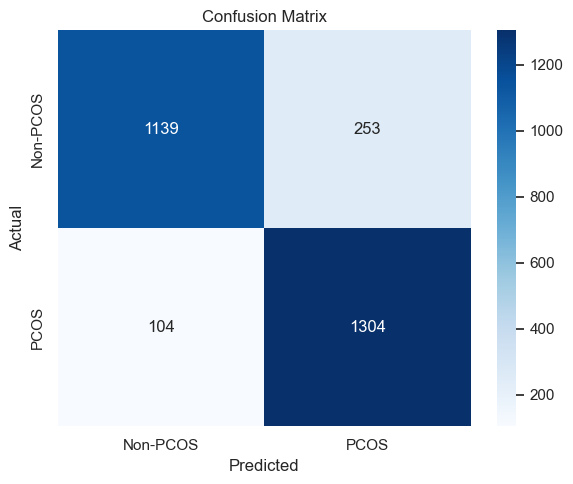

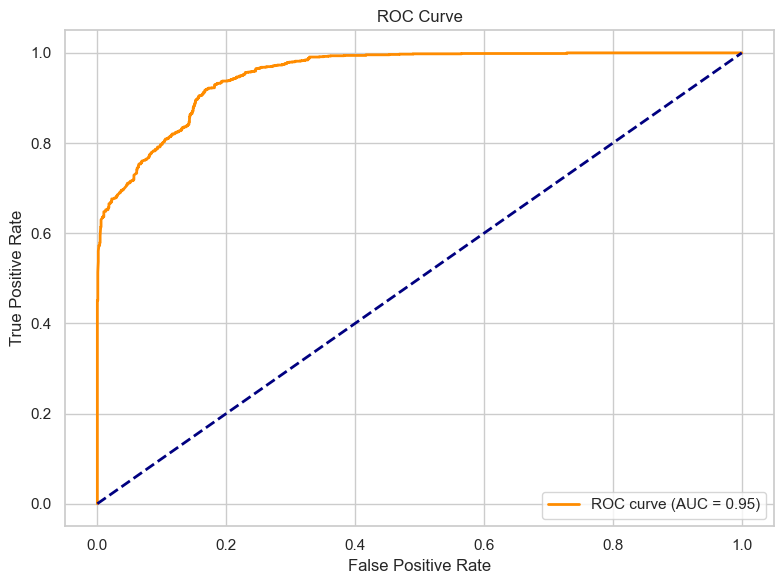

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import train_test_split, StratifiedKFold

def two_level_random_forest(X_train, y_train, X_test, y_test, feature_names):
    print("\n=== Level 1: Calibrated Random Forest ===")

    # Level 1 base model
    level1_rf_base = RandomForestClassifier(
        n_estimators=150,
        class_weight='balanced',
        max_depth=10,
        random_state=42
    )

    # Use StratifiedKFold to avoid imbalance issues during calibration
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Change to 'sigmoid' calibration to avoid overfitting with small folds
    level1_rf = CalibratedClassifierCV(estimator=level1_rf_base, method='sigmoid', cv=skf)

    start_time = time.time()
    level1_rf.fit(X_train, y_train)
    print(f"Level 1 Training Time: {time.time() - start_time:.2f} seconds")

    # Check prediction confidence
    level1_train_prob = level1_rf.predict_proba(X_train)[:, 1].reshape(-1, 1)
    level1_test_prob = level1_rf.predict_proba(X_test)[:, 1].reshape(-1, 1)

    print(f"\nSample Level 1 RF Probabilities (Test): {level1_test_prob[:10].flatten()}")

    # Check if all values are 1
    if np.allclose(level1_test_prob, 1):
        print("⚠️ Warning: All predicted probabilities are 1. Check data quality or calibration method.")

    # Scale the level 1 probabilities
    scaler = MinMaxScaler()
    level1_train_scaled = scaler.fit_transform(level1_train_prob)
    level1_test_scaled = scaler.transform(level1_test_prob)

    # Add Level1 prob to original features
    X_train_l2 = np.hstack((X_train, level1_train_scaled))
    X_test_l2 = np.hstack((X_test, level1_test_scaled))

    new_features = feature_names + ['Level1_RF_Prob']
    X_train_df = pd.DataFrame(X_train_l2, columns=new_features)
    X_test_df = pd.DataFrame(X_test_l2, columns=new_features)

    print("\n=== Level 2: Random Forest ===")

    param_dist = {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }

    level2_rf = RandomForestClassifier(random_state=42)

    random_search = RandomizedSearchCV(
        estimator=level2_rf,
        param_distributions=param_dist,
        n_iter=10,
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    start_time = time.time()
    random_search.fit(X_train_df, y_train)
    print(f"Level 2 Training Time: {time.time() - start_time:.2f} seconds")

    level2_rf = random_search.best_estimator_
    level2_rf.fit(X_train_df, y_train)

    final_pred = level2_rf.predict(X_test_df)
    final_prob = level2_rf.predict_proba(X_test_df)[:, 1]

    acc = accuracy_score(y_test, final_pred)
    pre = precision_score(y_test, final_pred)
    rec = recall_score(y_test, final_pred)
    f1 = f1_score(y_test, final_pred)

    print(f"\n=== Evaluation Metrics ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, final_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-PCOS", "PCOS"],
                yticklabels=["Non-PCOS", "PCOS"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, final_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return level1_rf, level2_rf, X_train_df, X_test_df, y_test

X_tomim = tomim_selected_features
a, b, c, d, e = two_level_random_forest(X_train_m_scaled, y_train_m, X_test_m_scaled, y_test_m, X_tomim)




=== Level 1: Calibrated Random Forest ===
Level 1 Training Time: 18.55 seconds

=== Level 2: Random Forest ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Level 2 Training Time: 71.28 seconds
Accuracy: 0.8693
Precision: 0.8335
Recall: 0.9247
F1 Score: 0.8768


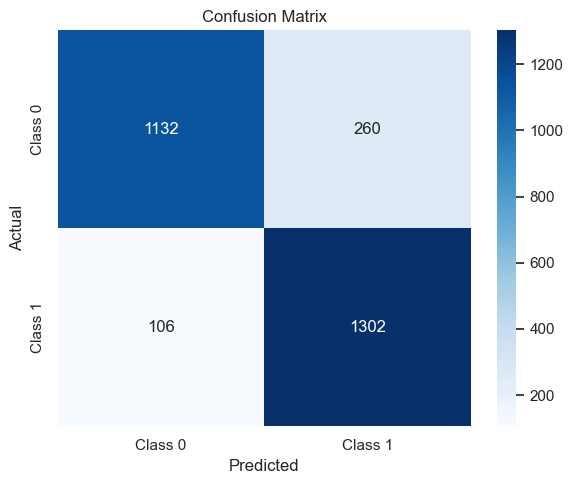

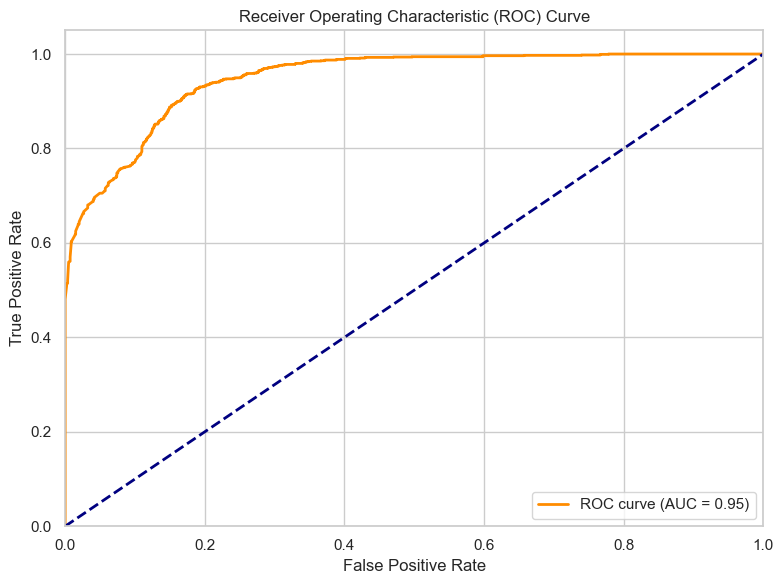

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

def two_level_random_forest(X_train, y_train, X_test, y_test, feature_names):
    print("\n=== Level 1: Calibrated Random Forest ===")
    level1_rf_base = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
    level1_rf = CalibratedClassifierCV(estimator=level1_rf_base, method='isotonic', cv=3)
    start_time = time.time()
    level1_rf.fit(X_train, y_train)
    print(f"Level 1 Training Time: {time.time() - start_time:.2f} seconds")

    level1_train_prob = level1_rf.predict_proba(X_train)[:, 1].reshape(-1, 1)
    level1_test_prob = level1_rf.predict_proba(X_test)[:, 1].reshape(-1, 1)

    scaler = MinMaxScaler()
    level1_train_scaled = scaler.fit_transform(level1_train_prob)
    level1_test_scaled = scaler.transform(level1_test_prob)

    X_train_l2 = np.hstack((X_train, level1_train_scaled))
    X_test_l2 = np.hstack((X_test, level1_test_scaled))

    new_features = feature_names + ['Level1_RF_Prob']
    X_train_df = pd.DataFrame(X_train_l2, columns=new_features)
    X_test_df = pd.DataFrame(X_test_l2, columns=new_features)

    print("\n=== Level 2: Random Forest ===")

    param_dist = {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }

    level2_rf = RandomForestClassifier(random_state=42)

    # Use RandomizedSearchCV for faster hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=level2_rf,
        param_distributions=param_dist,
        n_iter=10,  # Reduce number of iterations to speed up
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    start_time = time.time()
    random_search.fit(X_train_df, y_train)
    print(f"Level 2 Training Time: {time.time() - start_time:.2f} seconds")

    level2_rf = random_search.best_estimator_
    level2_rf.fit(X_train_df, y_train)

    final_pred = level2_rf.predict(X_test_df)
    final_prob = level2_rf.predict_proba(X_test_df)[:, 1]

    acc = accuracy_score(y_test, final_pred)
    pre = precision_score(y_test, final_pred)
    rec = recall_score(y_test, final_pred)
    f1 = f1_score(y_test, final_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, final_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, final_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return level1_rf, level2_rf, X_train_df, X_test_df, y_test

X_ossm = ossm_selected_features
a, b, c, d, e = two_level_random_forest(X_train_o_scaled, y_train_o, X_test_o_scaled, y_test_o, X_ossm)




=== Level 1: Calibrated Random Forest ===
Level 1 Training Time: 26.39 seconds

=== Level 2: Random Forest ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Level 2 Training Time: 108.44 seconds
Accuracy: 0.8793
Precision: 0.8399
Recall: 0.9389
F1 Score: 0.8867


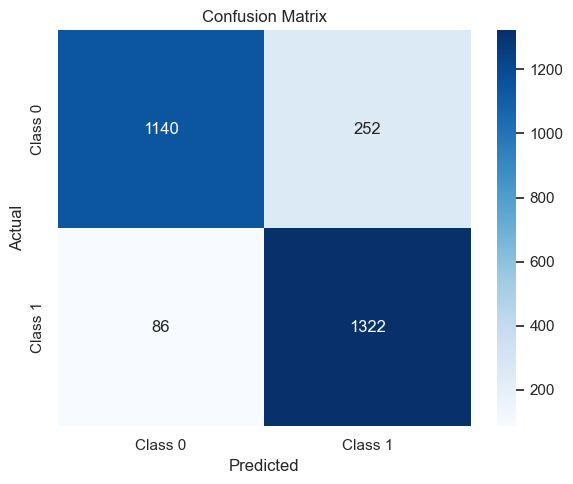

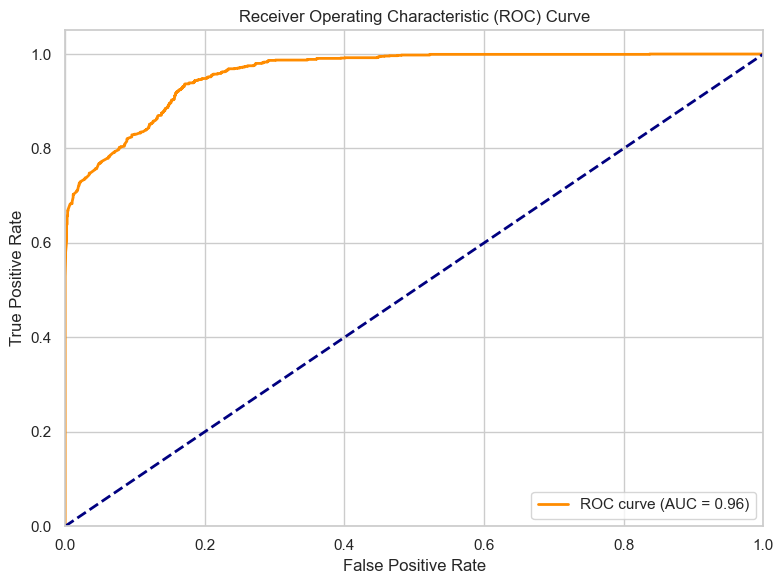

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

def two_level_random_forest(X_train, y_train, X_test, y_test, feature_names):
    print("\n=== Level 1: Calibrated Random Forest ===")
    level1_rf_base = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
    level1_rf = CalibratedClassifierCV(estimator=level1_rf_base, method='isotonic', cv=3)
    start_time = time.time()
    level1_rf.fit(X_train, y_train)
    print(f"Level 1 Training Time: {time.time() - start_time:.2f} seconds")

    level1_train_prob = level1_rf.predict_proba(X_train)[:, 1].reshape(-1, 1)
    level1_test_prob = level1_rf.predict_proba(X_test)[:, 1].reshape(-1, 1)

    scaler = MinMaxScaler()
    level1_train_scaled = scaler.fit_transform(level1_train_prob)
    level1_test_scaled = scaler.transform(level1_test_prob)

    X_train_l2 = np.hstack((X_train, level1_train_scaled))
    X_test_l2 = np.hstack((X_test, level1_test_scaled))

    new_features = feature_names + ['Level1_RF_Prob']
    X_train_df = pd.DataFrame(X_train_l2, columns=new_features)
    X_test_df = pd.DataFrame(X_test_l2, columns=new_features)

    print("\n=== Level 2: Random Forest ===")

    param_dist = {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }

    level2_rf = RandomForestClassifier(random_state=42)

    # Use RandomizedSearchCV for faster hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=level2_rf,
        param_distributions=param_dist,
        n_iter=10,  # Reduce number of iterations to speed up
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    start_time = time.time()
    random_search.fit(X_train_df, y_train)
    print(f"Level 2 Training Time: {time.time() - start_time:.2f} seconds")

    level2_rf = random_search.best_estimator_
    level2_rf.fit(X_train_df, y_train)

    final_pred = level2_rf.predict(X_test_df)
    final_prob = level2_rf.predict_proba(X_test_df)[:, 1]

    acc = accuracy_score(y_test, final_pred)
    pre = precision_score(y_test, final_pred)
    rec = recall_score(y_test, final_pred)
    f1 = f1_score(y_test, final_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, final_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, final_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return level1_rf, level2_rf, X_train_df, X_test_df, y_test

X_topca = topca_selected_features
a, b, c, d, e = two_level_random_forest(X_train_t_scaled, y_train_t, X_test_t_scaled, y_test_t, X_topca)




Training XGBoost with Tomim features...

=== XGBoost Model Training ===
XGBoost Training Time: 0.87 seconds
Accuracy: 0.8414
Precision: 0.8171
Recall: 0.8821
F1 Score: 0.8484


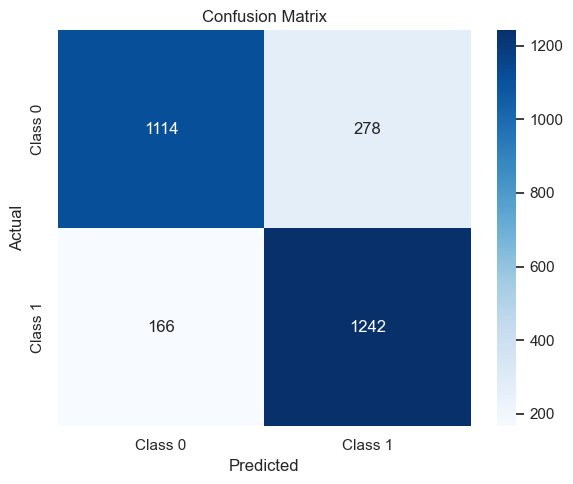

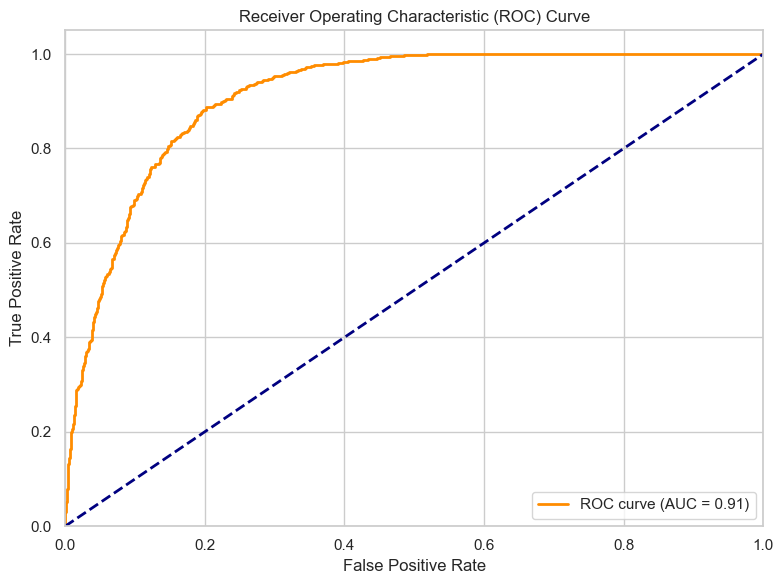


Training XGBoost with OSSM features...

=== XGBoost Model Training ===
XGBoost Training Time: 0.86 seconds
Accuracy: 0.8414
Precision: 0.8171
Recall: 0.8821
F1 Score: 0.8484


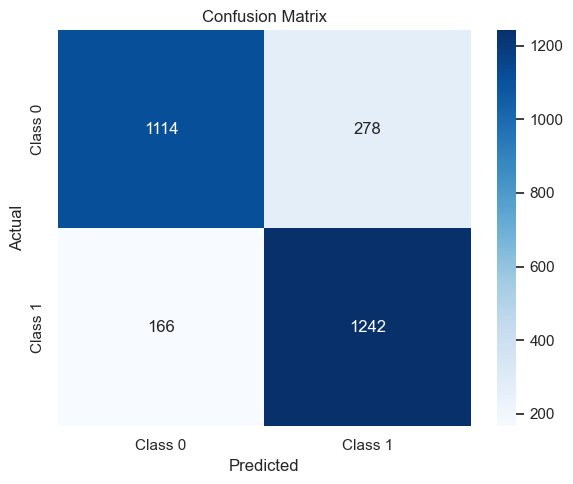

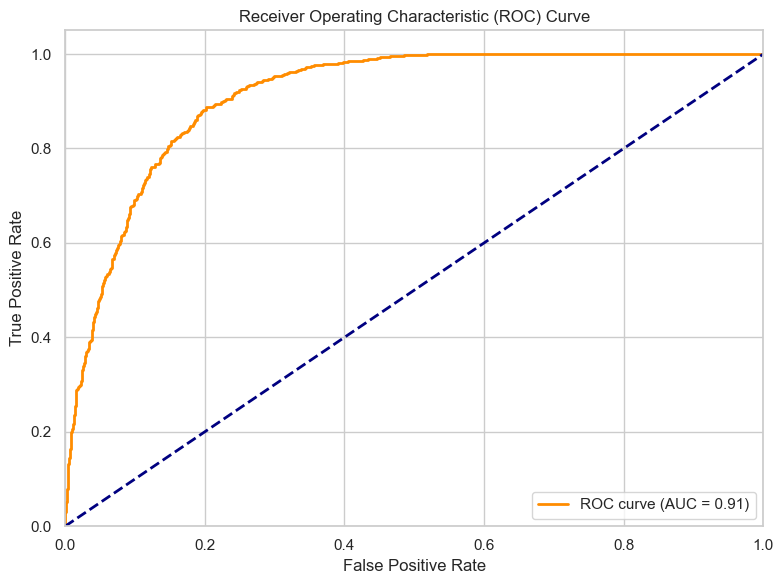


Training XGBoost with TOPCA features...

=== XGBoost Model Training ===
XGBoost Training Time: 0.85 seconds
Accuracy: 0.8414
Precision: 0.8171
Recall: 0.8821
F1 Score: 0.8484


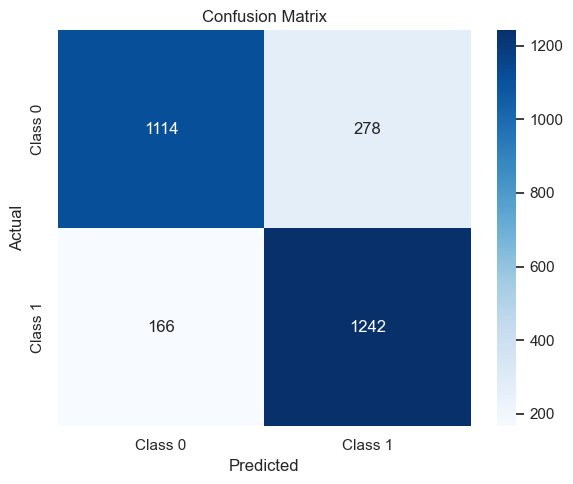

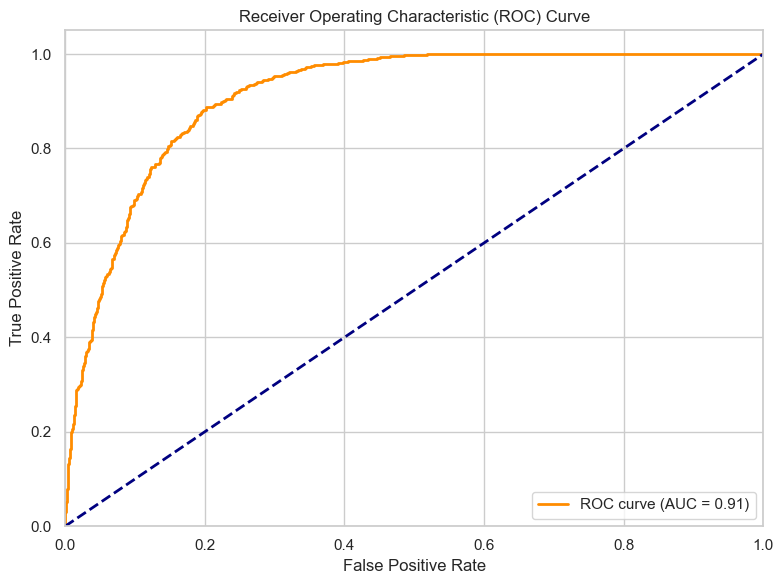

In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import time
import pandas as pd

def train_xgboost_model(X_train, y_train, X_test, y_test, feature_names):
    print("\n=== XGBoost Model Training ===")

    # Initialize XGBoost model
    xgboost_model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    )
    
    # Train the model
    start_time = time.time()
    xgboost_model.fit(X_train, y_train)
    print(f"XGBoost Training Time: {time.time() - start_time:.2f} seconds")

    # Predictions
    final_pred = xgboost_model.predict(X_test)
    final_prob = xgboost_model.predict_proba(X_test)[:, 1]

    # Performance Metrics
    acc = accuracy_score(y_test, final_pred)
    pre = precision_score(y_test, final_pred)
    rec = recall_score(y_test, final_pred)
    f1 = f1_score(y_test, final_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, final_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, final_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return xgboost_model

# Assuming the following features are selected and preprocessed:
# X_tomim = tomim_selected_features (Replace this with your actual data for TOMIM)
# X_ossm = ossm_selected_features (Replace this with your actual data for OSSM)
# X_topca = topca_selected_features (Replace this with your actual data for TOPCA)

X_tomim = tomim_selected_features  # Replace with your Tomim feature set
X_ossm = ossm_selected_features  # Replace with your OSSM feature set
X_topca = topca_selected_features  # Replace with your TOPCA feature set

# Train XGBoost using Tomim-selected features
print("\nTraining XGBoost with Tomim features...")
xgboost_model_tomim = train_xgboost_model(X_train_m_scaled, y_train_m, X_test_m_scaled, y_test_m, X_tomim)

# Train XGBoost using OSSM-selected features
print("\nTraining XGBoost with OSSM features...")
xgboost_model_ossm = train_xgboost_model(X_train_m_scaled, y_train_m, X_test_m_scaled, y_test_m, X_ossm)

# Train XGBoost using TOPCA-selected features
print("\nTraining XGBoost with TOPCA features...")
xgboost_model_topca = train_xgboost_model(X_train_m_scaled, y_train_m, X_test_m_scaled, y_test_m, X_topca)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import lime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import lime.lime_tabular
import shap

# For Explainable Dashboard
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from IPython.display import display
# Suppress warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import train_test_split, StratifiedKFold

def two_level_random_forest(X_train, y_train, X_test, y_test, feature_names):
    print("\n=== Level 1: Calibrated Random Forest ===")

    # Level 1 base model
    level1_rf_base = RandomForestClassifier(
        n_estimators=150,
        class_weight='balanced',
        max_depth=10,
        random_state=42
    )

    # Use StratifiedKFold to avoid imbalance issues during calibration
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Change to 'sigmoid' calibration to avoid overfitting with small folds
    level1_rf = CalibratedClassifierCV(estimator=level1_rf_base, method='sigmoid', cv=skf)

    start_time = time.time()
    level1_rf.fit(X_train, y_train)
    print(f"Level 1 Training Time: {time.time() - start_time:.2f} seconds")

    # Check prediction confidence
    level1_train_prob = level1_rf.predict_proba(X_train)[:, 1].reshape(-1, 1)
    level1_test_prob = level1_rf.predict_proba(X_test)[:, 1].reshape(-1, 1)

    print(f"\nSample Level 1 RF Probabilities (Test): {level1_test_prob[:10].flatten()}")

    # Check if all values are 1
    if np.allclose(level1_test_prob, 1):
        print("⚠️ Warning: All predicted probabilities are 1. Check data quality or calibration method.")

    # Scale the level 1 probabilities
    scaler = MinMaxScaler()
    level1_train_scaled = scaler.fit_transform(level1_train_prob)
    level1_test_scaled = scaler.transform(level1_test_prob)

    # Add Level1 prob to original features
    X_train_l2 = np.hstack((X_train, level1_train_scaled))
    X_test_l2 = np.hstack((X_test, level1_test_scaled))

    new_features = feature_names + ['Level1_RF_Prob']
    X_train_df = pd.DataFrame(X_train_l2, columns=new_features)
    X_test_df = pd.DataFrame(X_test_l2, columns=new_features)

    print("\n=== Level 2: Random Forest ===")

    param_dist = {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }

    level2_rf = RandomForestClassifier(random_state=42)

    random_search = RandomizedSearchCV(
        estimator=level2_rf,
        param_distributions=param_dist,
        n_iter=10,
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    start_time = time.time()
    random_search.fit(X_train_df, y_train)
    print(f"Level 2 Training Time: {time.time() - start_time:.2f} seconds")

    level2_rf = random_search.best_estimator_
    level2_rf.fit(X_train_df, y_train)

    final_pred = level2_rf.predict(X_test_df)
    final_prob = level2_rf.predict_proba(X_test_df)[:, 1]

    acc = accuracy_score(y_test, final_pred)
    pre = precision_score(y_test, final_pred)
    rec = recall_score(y_test, final_pred)
    f1 = f1_score(y_test, final_pred)

    print(f"\n=== Evaluation Metrics ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, final_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-PCOS", "PCOS"],
                yticklabels=["Non-PCOS", "PCOS"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, final_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return level1_rf, level2_rf, X_train_df, X_test_df, y_test


# LIME
def explain_with_lime(model, X_train_df, X_test_df, y_train):
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train_df.values,
        training_labels=y_train.values,
        feature_names=X_train_df.columns.tolist(),
        class_names=["Non-PCOS", "PCOS"],
        discretize_continuous=True,
        mode="classification"
    )
    
    for idx in range(3):
        exp = explainer.explain_instance(
            X_test_df.iloc[idx],
            lambda x: model.predict_proba(pd.DataFrame(x, columns=X_train_df.columns)),
            num_features=5
        )
        
        print(f"\nInstance {idx + 1} Explanation:")
        print(exp.as_list())

        # Save HTML file
        exp.save_to_file(f'lime_instance_{idx + 1}.html')
        
        # Display the bar graph inline
        fig = exp.as_pyplot_figure()
        fig.set_size_inches(6, 4)  # resize figure for better readability
        plt.title(f"LIME Explanation for Instance {idx + 1}")
        plt.tight_layout()
        display(fig)


# SHAP

import shap
import matplotlib.pyplot as plt

def explain_with_shap(model, X_test_df):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_df)

    print("\n=== SHAP Summary Plot (Top Features Impacting Class 1) ===")

    # Check if shap_values is a list (common in classification)
    if isinstance(shap_values, list) and len(shap_values) == 2:
        sv = shap_values[1]  # Use class 1's SHAP values
    else:
        sv = shap_values     # Regression or other cases

    # Check shape match
    if isinstance(sv, np.ndarray) and sv.shape[1] == X_test_df.shape[1]:
        # Summary plot (beeswarm)
        plt.figure(figsize=(10, 6))
        shap.summary_plot(sv, X_test_df, feature_names=X_test_df.columns, show=True)

        # SHAP bar plot (mean absolute SHAP value per feature)
        print("\n=== SHAP Feature Importance (Bar Plot) ===")
        plt.figure(figsize=(10, 6))
        shap.summary_plot(sv, X_test_df, plot_type="bar", feature_names=X_test_df.columns, show=True)
    else:
        print("❌ SHAP values shape doesn't match input data. Try checking model type or SHAP version.")




# Full Flow
def full_explanation_flow(X_train, y_train, X_test, y_test, feature_names):
    level1,model, X_train_df, X_test_df, y_test_final = two_level_random_forest(X_train, y_train, X_test, y_test, feature_names)

    print("\n=== LIME ===")
    explain_with_lime(model, X_train_df, X_test_df, y_train)

    print("\n=== SHAP ===")
    explain_with_shap(model, X_test_df)

    return level1,model


=== Level 1: Calibrated Random Forest ===
Level 1 Training Time: 4.20 seconds

Sample Level 1 RF Probabilities (Test): [0.83273823 0.75060087 0.72386028 0.47935626 0.75230166 0.77031432
 0.81187519 0.89404713 0.24440638 0.43045293]

=== Level 2: Random Forest ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Level 2 Training Time: 22.98 seconds

=== Evaluation Metrics ===
Accuracy: 0.8621
Precision: 0.8276
Recall: 0.9169
F1 Score: 0.8699


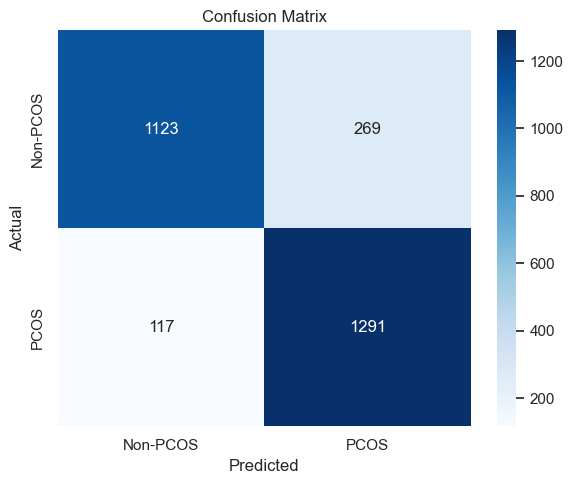

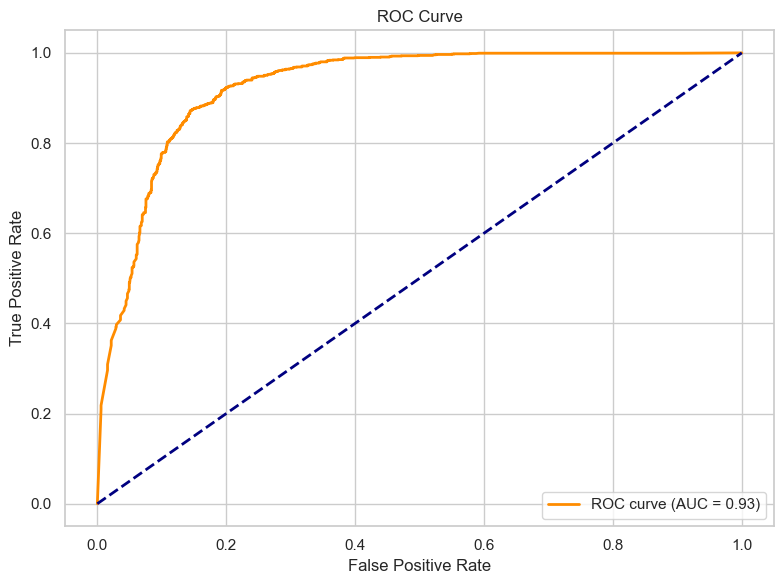


=== LIME ===

Instance 1 Explanation:
[('Level1_RF_Prob > 0.74', 0.68010867359382), ('Cycle length(days) > 0.91', -0.10338285868941972), ('AMH(ng/mL) <= -0.62', -0.05101887356755), ('-0.81 < Waist:Hip Ratio <= 0.01', 0.03833471043166215), ('II    beta-HCG(mIU/mL) > -0.10', -0.028134026664346945)]


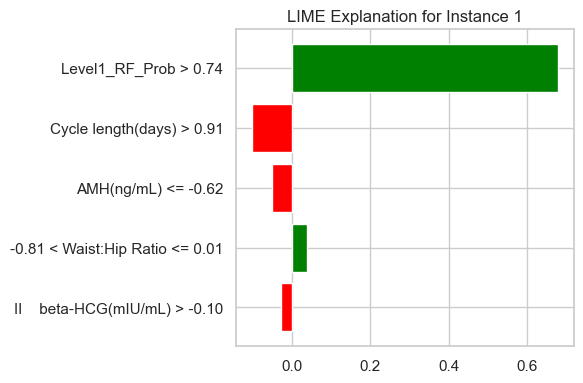


Instance 2 Explanation:
[('Level1_RF_Prob > 0.74', 0.6800919998910607), ('0.03 < Cycle length(days) <= 0.91', 0.06265582681651367), ('II    beta-HCG(mIU/mL) <= -0.23', -0.05350307732862316), ('Waist(inch) > 0.74', -0.05059811812809506), ('-0.81 < Waist:Hip Ratio <= 0.01', 0.032036224079979005)]


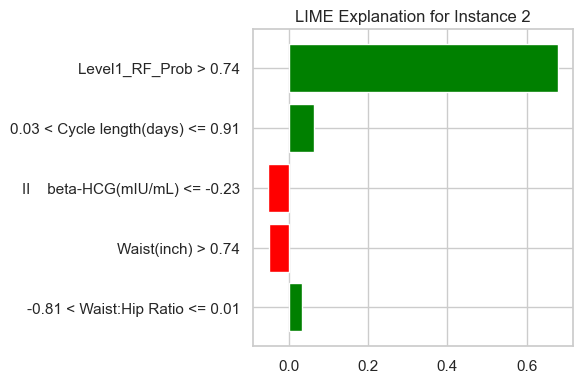


Instance 3 Explanation:
[('0.42 < Level1_RF_Prob <= 0.74', 0.1689433824437506), ('-0.87 < Cycle length(days) <= 0.03', 0.04527051093769758), ('AMH(ng/mL) > 0.26', 0.02836671709175895), ('II    beta-HCG(mIU/mL) > -0.10', -0.024284260745943878), ('Waist:Hip Ratio > 0.82', -0.02241825228534975)]


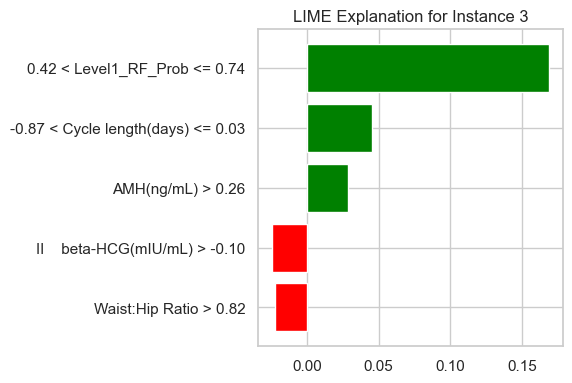


=== SHAP ===

=== SHAP Summary Plot (Top Features Impacting Class 1) ===


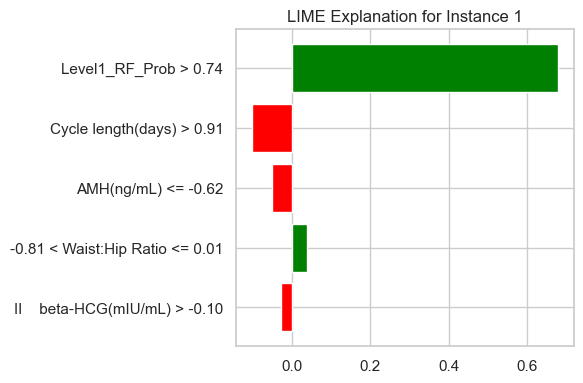

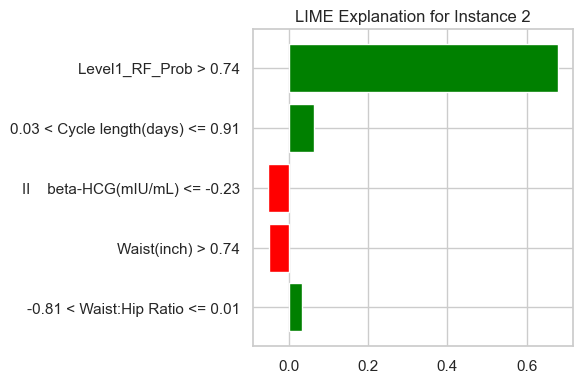

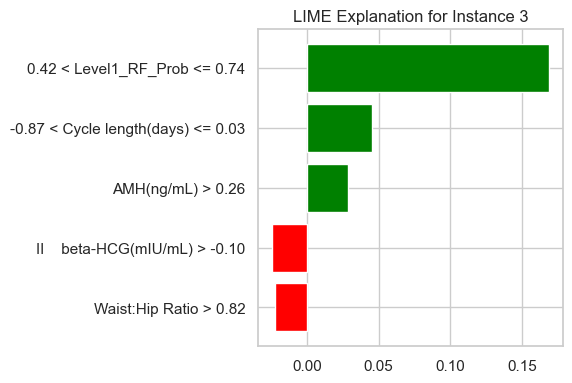

<Figure size 1000x600 with 0 Axes>

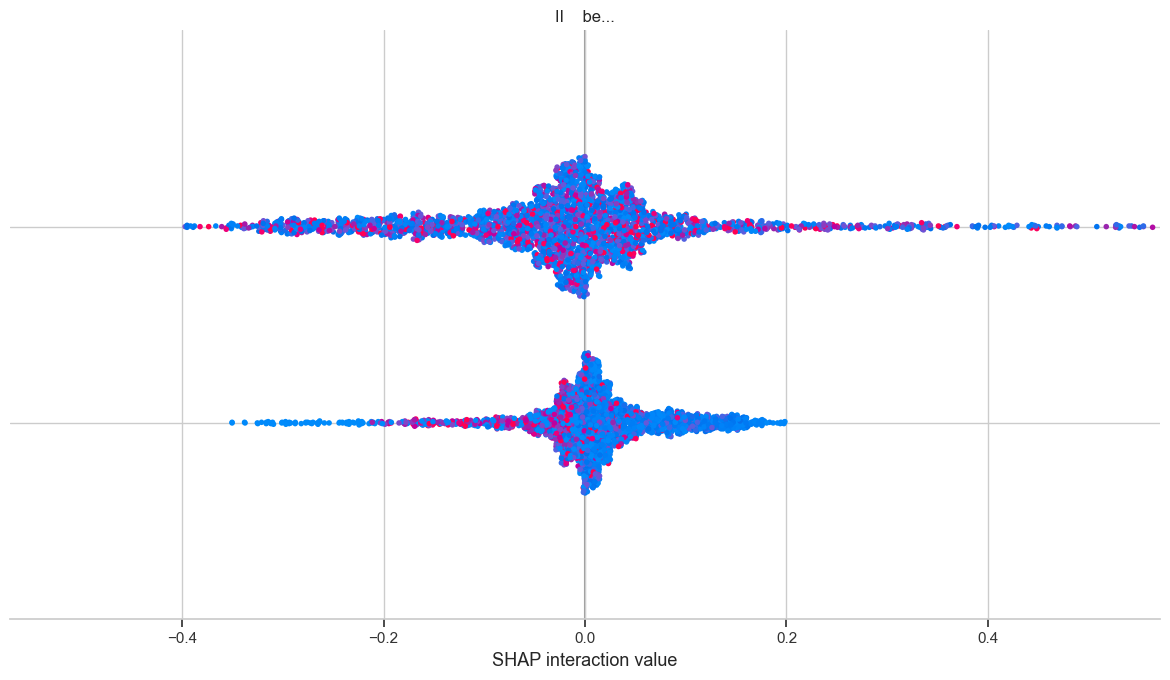


=== SHAP Feature Importance (Bar Plot) ===


<Figure size 1000x600 with 0 Axes>

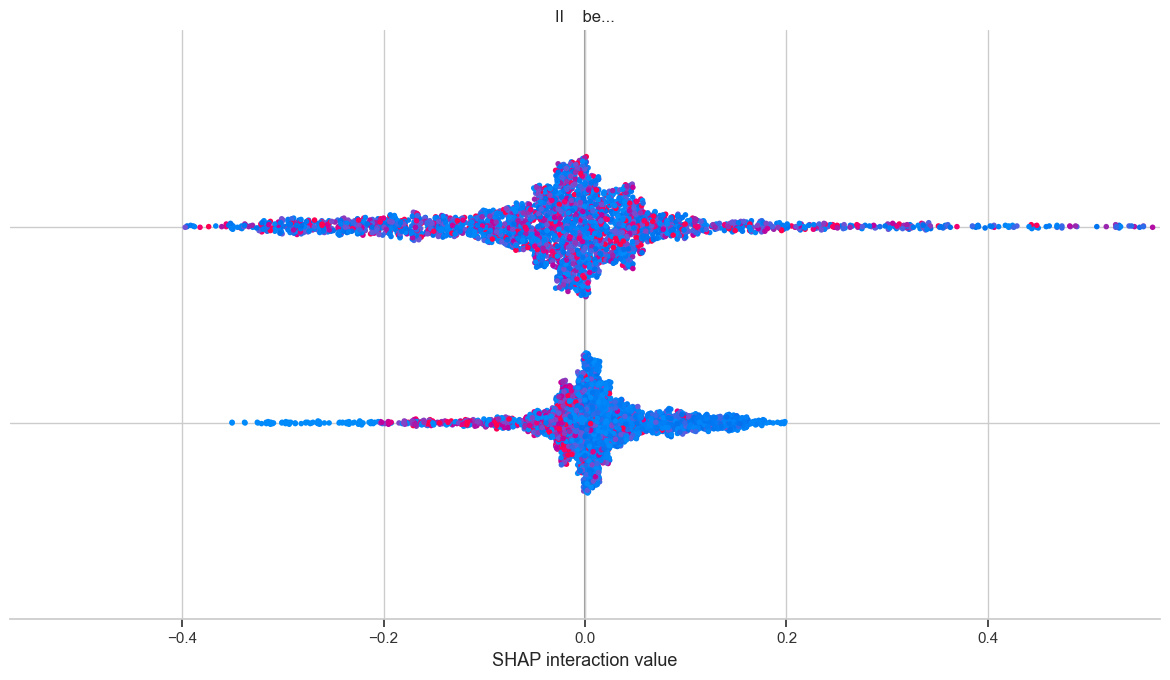

Done


In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


tomim_selected_features=['AMH(ng/mL)', 'II    beta-HCG(mIU/mL)', 'Waist(inch)', 'Cycle length(days)', 'Waist:Hip Ratio']
df = pd.read_csv("PCOS_after_preprocessing_1.csv")
feature_names = tomim_selected_features
X_tomim = df[tomim_selected_features]
y = df['PCOS (Y/N)']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_tomim, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_m_scaled = scaler.fit_transform(X_train_m)
X_test_m_scaled = scaler.transform(X_test_m)

X_train_m_scaled_df = pd.DataFrame(X_train_m_scaled, columns=feature_names)
X_test_m_scaled_df = pd.DataFrame(X_test_m_scaled, columns=feature_names)



level1,model=full_explanation_flow(X_train_m_scaled_df, y_train_m, X_test_m_scaled_df, y_test_m, feature_names)

import pickle

# Save model

# Load Level 1 RandomForest model
with open('level1_rf_model.pkl', 'wb') as f:
    pickle.dump(level1,f)

with open("trained_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler (use the same scaler that was fit on X_train_m)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Done")